# 🍕 Chào mừng bạn đến với Phân tích bán hàng Pizza của chúng tôi!

<img src="https://cdn.britannica.com/08/177308-050-94D9D6BE/Food-Pizza-Basil-Tomato.jpg" alt="Markdown">

<div style="background-color: #E5E4E2; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
<p>Đối với Thử thách Maven Pizza, bạn sẽ đóng vai Nhà tư vấn BI được thuê bởi Plato's Pizza, một địa điểm bán pizza lấy cảm hứng từ Hy Lạp ở New Jersey. Bạn được thuê để giúp nhà hàng sử dụng dữ liệu nhằm cải thiện hoạt động và vừa nhận được thông báo sau:
<blockquote style="border-left: 3px solid #C4A484;">
Chào mừng bạn lên tàu, chúng tôi rất vui vì bạn ở đây để trợ giúp!<br>

Mọi thứ đang ổn ở Plato's, nhưng vẫn còn chỗ để cải thiện. Chúng tôi đã thu thập dữ liệu giao dịch trong năm qua nhưng thực sự chưa thể sử dụng nó hiệu quả. Hy vọng bạn có thể phân tích dữ liệu và tổng hợp báo cáo để giúp chúng tôi tìm cơ hội tăng doanh số bán hàng và làm việc hiệu quả hơn.</blockquote></p>
<p>Trong sổ tay này, chúng ta sẽ xem xét tập dữ liệu về Doanh số bán Pizza. Để làm như vậy, chúng tôi sẽ sử dụng tập dữ liệu sau: <code>Data Model - Pizza Sales.xlsx</code>, được tải xuống từ Kaggle <a href="https://www.kaggle.com/datasets/shilongzhuang/pizza-sales">tại đây</a>.</p>

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>Data Model - Pizza Sales.xlsx</b></div>
    Tập dữ liệu bán bánh pizza này bao gồm 12 thuộc tính có liên quan:
<ul>
    <li><b>order_id:</b> Mã định danh duy nhất cho mỗi đơn hàng được đặt bởi một bảng.</li>
    <li><b>order_details_id:</b> Mã nhận dạng duy nhất cho mỗi chiếc pizza được đặt trong mỗi đơn hàng (những chiếc pizza cùng loại và kích cỡ được giữ trong cùng một hàng và số lượng sẽ tăng lên).</li>
    <li><b>pizza_id:</b> Mã định danh khóa duy nhất gắn kết chiếc bánh pizza được đặt hàng với các chi tiết của nó, như kích thước và giá cả.</li>
    <li><b>quantity:</b> Số lượng đặt hàng cho mỗi chiếc pizza cùng loại và kích cỡ.</li>
    <li><b>order_date:</b> Ngày đặt hàng (được nhập vào hệ thống trước khi nấu và phục vụ).</li>
    <li><b>order_time:</b> Thời gian đặt hàng (được nhập vào hệ thống trước khi nấu và phục vụ).</li>
    <li><b>unit_price:</b> Giá pizza tính bằng USD.</li>
    <li><b>total_price:</b> unit_price * quantity.</li>
    <li><b>pizza_size:</b> Kích cỡ của pizza (Small, Medium, Large, X Large, or XX Large).</li>
    <li><b>pizza_category:</b> Hạng mục pizza (Classic, Supreme, Veggie, or Chicken).</li>
    <li><b>pizza_ingredients:</b> các nguyên liệu được sử dụng trong pizza như được hiển thị trong thực đơn (tất cả đều bao gồm Mozzarella Cheese, ngay cả khi không được chỉ định; và tất cả đều bao gồm sốt Tomato, trừ khi có loại nước sốt khác được chỉ định).</li>
    <li><b>pizza_name:</b> Tên của pizza như trong menu.</li>
</ul>
    </div>

# Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import warnings 
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from wordcloud import WordCloud, STOPWORDS


# [Đọc dữ liệu đầu vào](https://www.kaggle.com/datasets/shilongzhuang/pizza-sales)

In [2]:
df = pd.read_csv(r'Data Model - Pizza Sales.csv')
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# Một số thống kê cơ bản về dữ liệu

In [3]:
df.shape

(48620, 12)

In [4]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 5px 5px 25px; line-height: 1.6;">

- <b>Categorical data:</b> pizza_size,	pizza_category,	pizza_ingredients,	pizza_name
- <b>Numerical data:</b> quantity, unit_price,	total_price

In [6]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


# Làm sạch dữ liệu

In [7]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
number_of_pizza = df.pizza_name.nunique()
print(f"Pizza của Plato gồm {number_of_pizza} loại pizza!")

Pizza của Plato gồm 32 loại pizza!


Không có gì để làm sạch. Tất cả chúng ta đã sẵn sàng cho giai đoạn tiếp theo: phân tích dữ liệu!

# Phân tích dữ liệu (DA)

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>Chúng tôi muốn khám phá những câu hỏi này:</b></div>

1. Phân tích xu hướng đặt hàng theo ngày và giờ.
2. Mối quan hệ giữa các loại pizza trong đơn đặt hàng?
3. Topping nào được yêu thích nhất.
4. Đưa ra tỉ lệ phân bổ của pizza theo danh mục và kích thước.
5. So sánh số lượng các loại pizza được đặt ở cỡ L, M, S.
6. Doanh thu theo ngày.
7. Top 10 loại pizza bán chạy nhất và tệ nhất của chúng tôi là gì?
8. Đưa ra doanh số của các loại pizza theo danh mục?
    
</div>

#### *** Đưa ra phân phối giá của pizza

In [10]:
total_order_prices = df.groupby("order_id")["total_price"].sum()

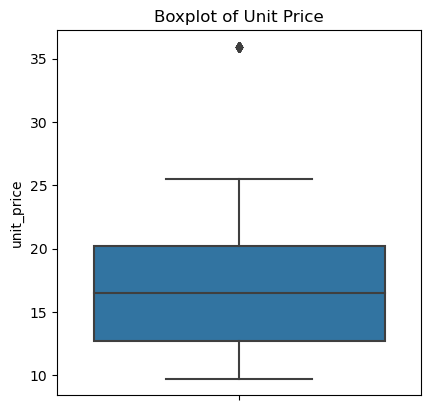

In [11]:
plt.figure(figsize=(12, 8))


plt.subplot(2, 3, 1)
sns.boxplot(y='unit_price', data=df)
plt.title('Boxplot of Unit Price')

plt.tight_layout()
plt.show()

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>Biểu đồ phân phối về đơn giá của các loại pizza.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">Mức giá trung bình tầm 17 USD</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">Múc giá trải dài từ 10 USD đến 37 USD</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">50% mức giá từ 13 USD đến 21 USD</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">Râu trái ngắn hơn râu phải, median nằm gần chỉnh giữa, phân phối có vẻ hơi lệch phải</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">Ngoài ra, có một vài mức giá cao hơn bất thường tầm 37 USD</p>

### 1. Phân tích xu hướng đặt hàng theo ngày và giờ.

In [12]:
df['order_time']=df['order_time'].astype('string')
df[['Hour','Minute', 'Second']]= df['order_time'].str.split(":",expand=True)

In [13]:
df['datetime'] = pd.to_datetime(df['order_date'].astype(str) + ' ' + df['order_time'].astype(str))
df['weekday'] = df['datetime'].dt.strftime('%A')

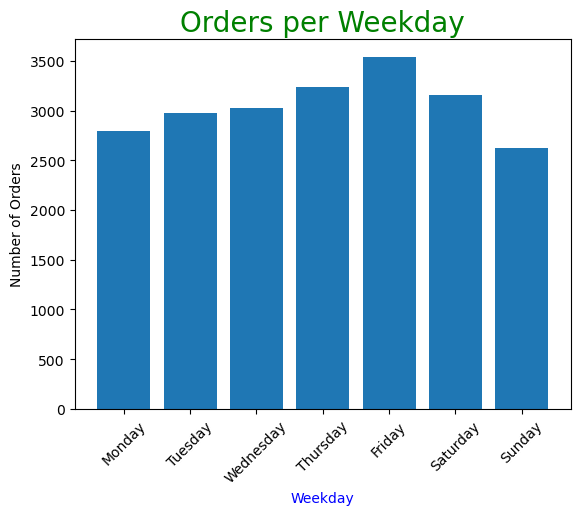

In [14]:
weekday_orders = df.groupby('weekday')['order_id'].nunique()


weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


weekday_orders = weekday_orders.reindex(weekday_order)
        



plt.bar(weekday_orders.index, weekday_orders.values)
plt.xlabel('Weekday',color = 'blue')
plt.ylabel('Number of Orders')
plt.title('Orders per Weekday',fontsize = 20,color = 'green')


plt.xticks(rotation=45)
plt.show()

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>Xu hướng đặt hàng theo ngày.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nhận xét:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Ngày bận rộn nhất trong tuần xét về số lượng đơn hàng là Thứ Sáu</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Những ngày có số lượng đơn hàng tương đối cao là Thứ Năm, Thứ Bảy, Thứ Tư</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Thứ Hai và thứ Ba không có sự khác biệt đáng kể về số lượng đơn hàng</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Chủ Nhật có số lượng đơn hàng thấp nhất trong tuần</p>
    -> Đề xuất: Xem xét số lượng đơn đặt hàng cao vào thứ Sáu, có thể sẽ có ích nếu phân bổ thêm nguồn lực và nhân viên trong ngày đó để đảm bảo hoạt động hiệu quả và sự hài lòng của khách hàng.

In [15]:
hourly_orders = df.groupby(df['datetime'].dt.hour)['order_id'].nunique()
hourly_orders = hourly_orders.sort_index()

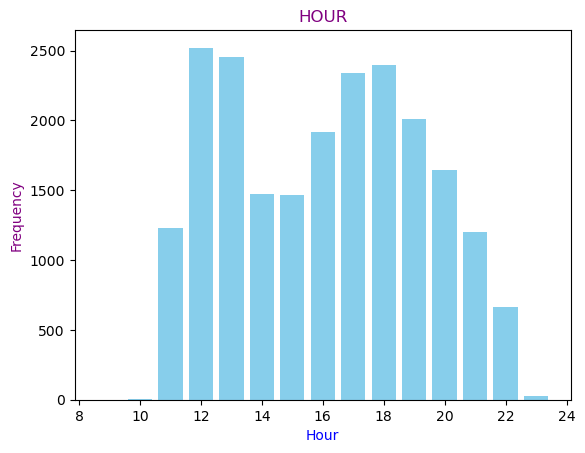

In [16]:
plt.bar(hourly_orders.index, hourly_orders.values, color="skyblue")
plt.xlabel("Hour",fontsize=10,color="blue")
plt.ylabel("Frequency",fontsize=10,color="purple")
plt.title("HOUR",color="purple")
plt.show()

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>Xu hướng đặt hàng theo giờ.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nhận xét:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Giờ bận rộn nhất: Giờ 12 có số lượng đơn hàng cao nhất. Điều này cho thấy khoảng thời gian hoạt động cao điểm và cho thấy khách hàng có xu hướng đặt một số lượng lớn đơn hàng vào khoảng giữa trưa.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Giờ trưa cao điểm: Giờ 12, 13 có lượng đơn hàng khá lớn. Điều này cho thấy có thể là trong giờ ăn trưa.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Buổi tối cao điểm: Giờ 17 và 18 cho thấy số lượng đơn hàng tương đối cao. Điều này cho thấy có một buổi tối cao điểm khi khách hàng có xu hướng đặt hàng, có thể là trong giờ ăn tối.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Sáng sớm và tối muộn: Các khung giờ 9, 10, 23 có số lượng đơn hàng thấp nhất.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Số lượng đơn hàng ít nhất là vào giờ thứ 9 </p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">-> Đề xuất: </p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Khoảng thời gian cao điểm vào giờ cao điểm giữa trưa và buổi tối cho thấy nhu cầu về pizza cao hơn. Sẽ rất hữu ích nếu có một quy trình hợp lý và đủ nhân viên trong thời gian này để xử lý khối lượng đơn hàng tăng lên một cách hiệu quả.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Số lượng đơn đặt hàng thấp trong giờ sáng sớm và đêm khuya cho thấy nhu cầu thấp hơn trong thời gian đó. Có thể đáng để xem xét điều chỉnh mức độ nhân sự hoặc giờ hoạt động để tối ưu hóa việc sử dụng tài nguyên.</p>

### 2. Mối quan hệ giữa các loại pizza trong đơn đặt hàng?

<Axes: >

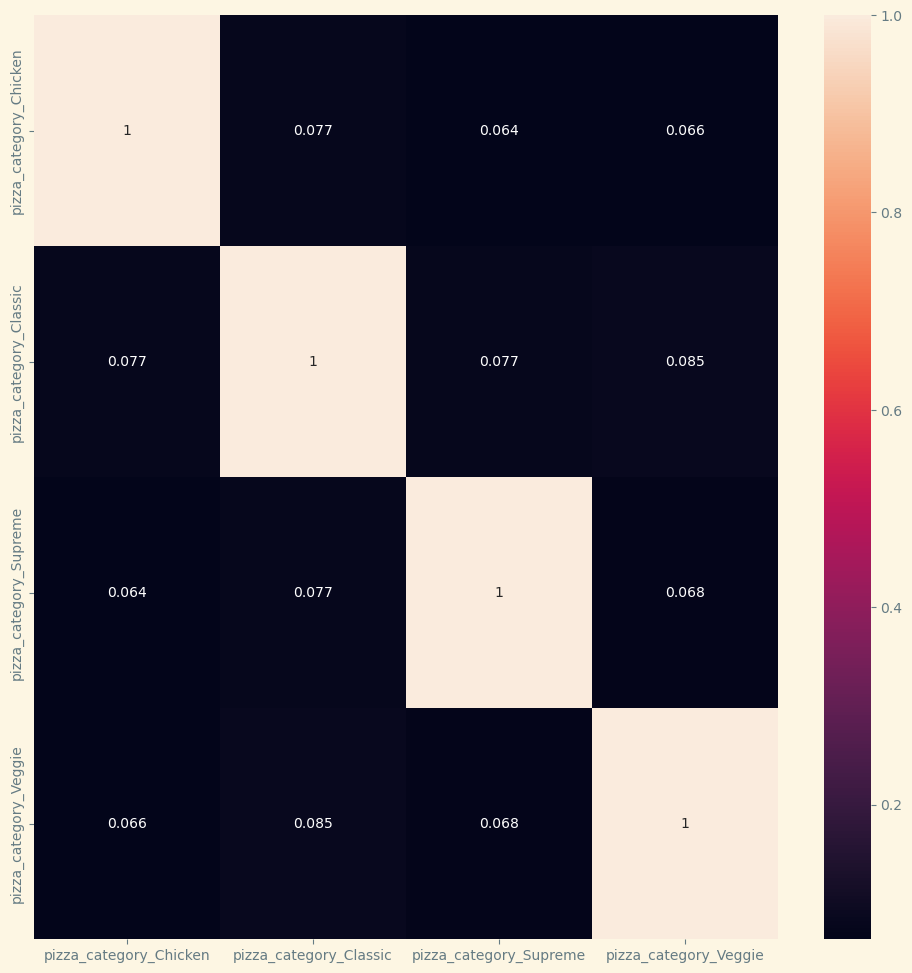

In [34]:
df2 = pd.get_dummies(df[['order_id', 'pizza_category']].set_index('order_id', drop=True))
df2 = df2.groupby(df2.index).sum()
sns.heatmap(df2.corr(), annot=True)

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>Mối quan hệ giữa các loại pizza trong đơn đặt hàng.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nhận xét:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Phân tích mối tương quan:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">+ Các ô ngoài đường chéo cho thấy mối tương quan giữa các loại pizza khác nhau. Các giá trị này khá thấp (dao động từ 0,064 đến 0,085), cho thấy mối quan hệ tích cực rất yếu giữa việc đặt hàng các loại pizza khác nhau. Điều này có nghĩa là có một xu hướng nhỏ là nếu một loại bánh pizza được đặt thì loại khác cũng có thể được đặt, nhưng mối quan hệ không chặt chẽ.
</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">+ Ví dụ: mối tương quan giữa pizza_category_Chicken và pizza_category_Classic là 0,077, giữa pizza_category_Chicken và pizza_category_Supreme là 0,064 và giữa pizza_category_Chicken và pizza_category_Veggie là 0,066. Tất cả đều dương nhưng rất gần bằng 0, cho thấy mối quan hệ tích cực rất yếu.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Mối tương quan ngoài đường chéo mạnh nhất ở đây là giữa pizza_category_Classic và pizza_category_Classic, với hệ số 0,085, vẫn được coi là mối tương quan yếu</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">Nhìn chung, bản đồ nhiệt cho thấy rằng không có mối quan hệ chặt chẽ giữa các loại pizza trong đơn đặt hàng. Xác xuất để các loại pizza được đặt kèm cùng nhau trong 1 đơn hàng là rất thấp</p>

### 3. Topping nào được yêu thích nhất?

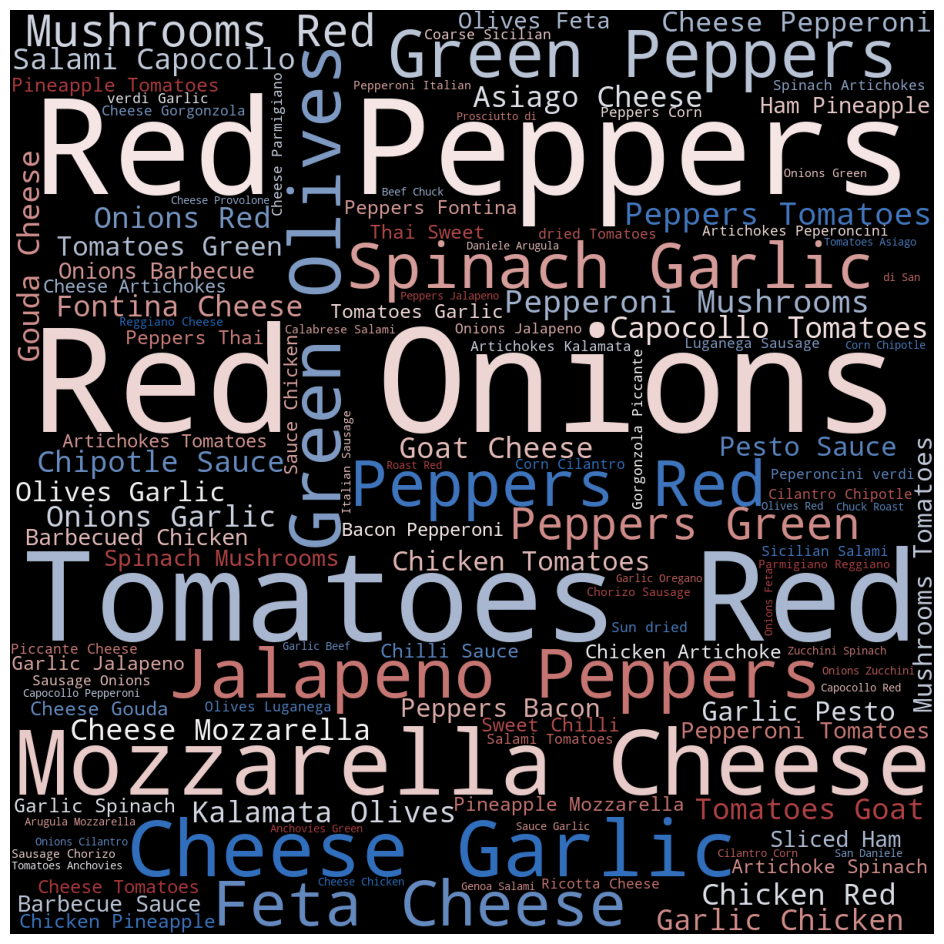

In [18]:
text = ' '.join(df['pizza_ingredients'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>Thành phần phổ biến nhất.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nhận xét:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Dựa vào biểu đồ, có thể nhận thấy các thành phần phổ biến nhất trong danh sách thành phần của pizza, bao gồm:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Red Peppers, Red Onions, Tomatoes red, Mozzarella Cheese</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Ngoài ra, còn 1 số thành phần phổ biến như: Green Olives, Cheer Galic, Jalapeno Peppers, Green Peppers, ...</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Phân tích các thành phần chính giúp cho nhà hàng có cái nhìn tổng quan về sở thích khách hàng, qua đó giúp cải thiện thực đơn nhằm tăng doanh số nhà hàng</p>

### 4. Đưa ra tỉ lệ phân bổ pizza theo danh mục và kích thước

In [19]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=df['pizza_size'].value_counts().index, values=df['pizza_size'].value_counts(), name="Pizza Size"), 1, 1)
fig.add_trace(go.Pie(labels=df['pizza_category'].value_counts().index, values=df['pizza_category'].value_counts(), name="Pizza Category"), 1, 2)
fig.update_traces(hole=.5, hoverinfo="label+percent", textinfo='percent+label', textposition='inside')
fig.update_layout(title_text="Pizza Sizes and Categories",
                  annotations=[dict(text='Size', x=0.05, y=0.9, font_size=18, showarrow=False),
                               dict(text='Category', x=.6, y=.9, font_size=18, showarrow=False)])
fig.show()

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>Tỉ lệ phân bổ pizza theo kích thước.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nhận xét:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Pizza size L được mua nhiều nhất với tỉ lệ là 38.1%</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Xếp sau là các pizza size M và size S với tỉ lệ là 31,6% và 29,1 được bán cũng khá chạy</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Tất cả đều có sự phân bổ cân bằng, ngoại trừ cỡ XL chỉ chiếm 1,12% tổng số.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">-> Đề xuất: Xem xét đến việc tiêu chuẩn hóa quy trình để giảm chi phí, nhà hàng có thể sẽ thấy thú vị khi phân tích việc ngừng cung cấp cỡ XXL</p>
<h3>Tỉ lệ phân bổ pizza theo danh mục.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nhận xét:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Loại pizza Classic bán được nhiều nhất với tỉ lệ chiếm 30%</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Xếp sau là các pizza Supreme, Veggie, Chicken với tỉ lệ khá cân bằng là: 24.2%, 23.5%, 22.2%</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nói chung, tỉ lệ pizza bán ra khá cân bằng giữa các danh mục, không có sự chênh lệch quá lớn về tỉ lệ</p>

### 5. So sánh số lượng các loại pizza được đặt ở cỡ L, M, S

In [20]:
l_pizza = df[df.pizza_size == "L"]
most_L_pizza = l_pizza.groupby("pizza_id")["quantity"].sum().sort_values(ascending = False).reset_index(name = "count")

In [21]:
px.bar(most_L_pizza, x = "pizza_id", y = "count", text = "count", color = "count", color_continuous_scale="aggrnyl_r").update_layout(title = 
                                      "Comparing Count of Pizza's Ordered in L Size", title_font=dict(size=25,color="darkgreen"),
                                      title_x=0.5)

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>So sánh các loại pizza được đặt ở size L.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nhận xét:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Loại pizza "thai_ckn_l" có số lượng đặt cao nhất trong kích thước L, với khoảng 1410 đơn đặt hàng. Sau đó là loại "five_cheese_l" với mức đặt hàng tương đương 1409 đơn</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Các loại pizza như "ital_veggie_l", "ckn_alfredo_l", "green_garden_l" có số lượng đặt thấp nhất trong kích thước L, mỗi loại pizza chỉ có dưới 200 đơn đặt hàng. trong đó thấp nhất là "green_garden_l” với 95 đơn đặt hàng</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">Có sự biến động đáng kể trong số lượng pizza đặt hàng giữa các loại pizza khác nhau, với một số loại pizza có số lượng đặt hàng cao hơn đáng kể so với các loại khác</p>

In [22]:
#most sold M size pizza
m_size = df[df.pizza_size == "M"]
m_size_count = m_size.groupby("pizza_id")["quantity"].sum().sort_values(ascending = False).reset_index(name = "count").rename(columns={"index":"pizza_id"})
px.bar(m_size_count, x = "pizza_id", y = "count", color = "count", color_continuous_scale="sunset", text = "count").update_layout(
   title = "Comparing Count of Pizza's Ordered in M Size", title_font=dict(size=25,color="steelblue"), title_x=0.5
)

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>So sánh các loại pizza được đặt ở size M.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nhận xét:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Loại pizza "classic_dlx_m" có số lượng đặt cao nhất trong kích thước M, với khoảng 1181 đơn đặt hàng.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Các loại pizza như "green_garden_m", "spin_pesto_m", "the_greek_m", “ckn_pesto_m”, “mediterraneo_m”, “soppressata_m”, “spinach_supr_m” có số lượng đặt thấp nhất trong kích thước M, mỗi loại pizza chỉ có số lượng đặt hàng khoảng  300 trở xuống  đơn đặt hàng. trong đó thấp nhất là “spinach_supr_m” với 267 đơn đặt hàng</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Sự chênh lệch các mức đơn đặt hàng làm phân ra rõ các mức pizza phổ biến. Trong mỗi mức độ phổ biến thì số lượng đơn chênh lệch giữa các loại pizza khá là thấp ổn định</p>

In [23]:
s_size = df[df['pizza_size'] == "S"]
s_size_count = s_size.groupby("pizza_id")["quantity"].sum().sort_values(ascending = False).reset_index(name = "count").rename(columns={"index":"pizza_id"})
px.bar(s_size_count, x = "pizza_id", y = "count", text = "count", color = "count", color_continuous_scale = "spectral_r").update_layout(
    title = "Comparing Count of Pizza's Ordered in S Size", title_font=dict(size=25,color="maroon",family="Helvetica"), title_x=0.5
)

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>So sánh các loại pizza được đặt ở size S.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nhận xét:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Loại pizza "big_meat_s" có số lượng đặt cao nhất trong kích thước s, với khoảng 1914 đơn đặt hàng vượt trội hơn hẳn so với các loại pizza khác.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Các loại pizza như “calabrese_s”, “ckn_alfredo_s” có số lượng đặt thấp nhất trong kích thước M, mỗi loại pizza chỉ có số lượng đặt hàng dưới 100 đơn đặt hàng. trong đó thấp nhất là “ckn_alfredo_s” với 96 đơn đặt hàng</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Pizza "big_meat_s" có số lượng bán vượt trội hơn hẳn các loại pizzz khác còn lại đa phần những pizza có mức bán trung bình có số lượng bán ra khá là đều nhau với số lượng trung bình khoảng 300-500 chiếc mỗi loại</p>

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>Đề xuất chung: </h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Đối với các loại pizza bán chạy, có thể nghĩ tới việc tạo ra các biến thể.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Đối với các loại bị ra bán ra ít, cần tăng cường các hoạt động kích cầu như: khuyến mãi, giảm giá, cần giới thiệu sản phẩm rộng rãi tới nhiều người, tìm hiểu về nhu cầu của khách hàng, ta cũng có thể nghiên cứu cải tiến công thức chất lượng nguyên liệu phù hợp để tăng hương vị cũng như phù hợp với nhu cầu khách hàng .v.v...</p>

### 6. Doanh thu theo ngày.

In [24]:
df['order_date']
data = df.groupby('order_date').agg({'total_price': 'sum'})
data.index = pd.to_datetime(data.index)
data = data.sort_values(by= 'order_date',ascending=True)

Text(0.5, 1.0, 'Revenue per day')

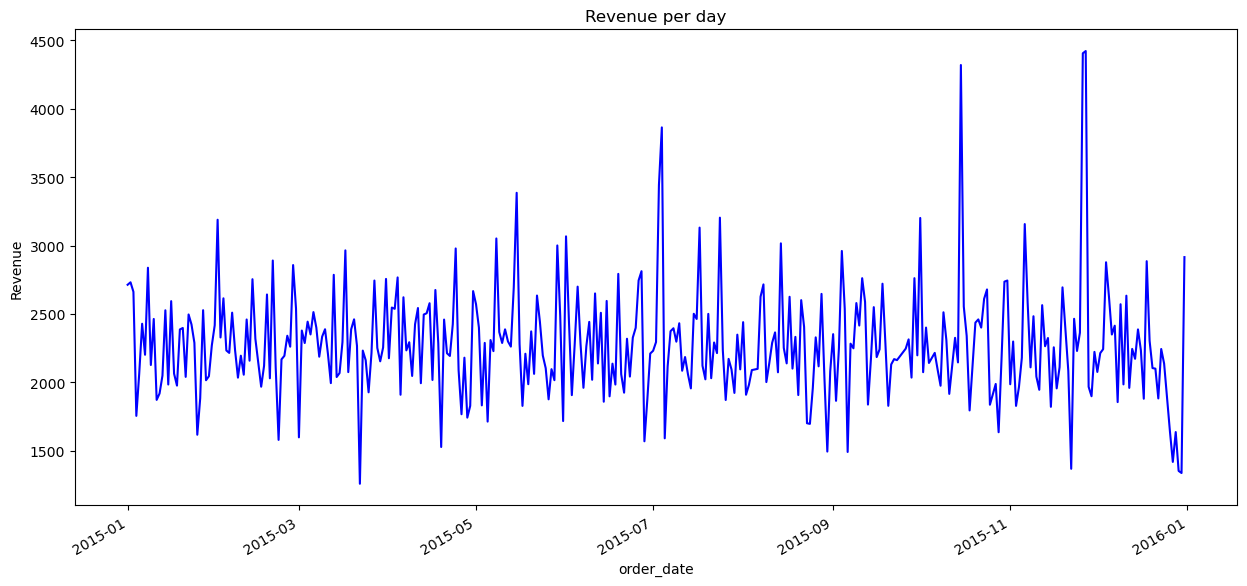

In [25]:
data.plot(kind = 'line', figsize=(15,7), legend=False, color="blue")
plt.ylabel('Revenue')
plt.title('Revenue per day')


<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>Doanh thu theo ngày.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nhận xét:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Xu hướng tổng quan: Biểu đồ này biểu diễn doanh thu hàng ngày qua thời gian. Có vẻ như có một mức độ biến động lớn, với các đỉnh và đáy không đều. Có một số điểm thời gian nổi bật với doanh thu cao và thấp đột ngột.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Biến động: Có sự biến động lớn trong doanh thu, với các đỉnh và đáy rõ ràng trên đường biểu diễn. Điều này có thể phản ánh sự biến động trong mức độ hoạt động hoặc yếu tố bên ngoài ảnh hưởng đến doanh thu.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Các điểm nổi bật: Có những điểm đỉnh cao và điểm đáy thấp đáng chú ý trên biểu đồ, cho thấy các ngày có doanh thu cao nhất và thấp nhất.</p>

### 7. Top 10 loại pizza bán chạy nhất và tệ nhất của chúng tôi là gì?

In [26]:
pizza_sales = df.groupby('pizza_name')['unit_price'].sum()

pizza_sales = pizza_sales.sort_values(ascending=False)

In [27]:
# Top 10 Best Selling Pizzas is:
pizza_sales.head(10)

pizza_name
The Thai Chicken Pizza          42332.25
The Barbecue Chicken Pizza      41683.00
The California Chicken Pizza    40166.50
The Classic Deluxe Pizza        37631.50
The Spicy Italian Pizza         34163.50
The Southwest Chicken Pizza     34081.75
The Italian Supreme Pizza       32856.25
The Hawaiian Pizza              31561.75
The Four Cheese Pizza           31361.10
The Sicilian Pizza              30123.75
Name: unit_price, dtype: float64

In [28]:
#Top 10 Wrost Pizza is:
pizza_sales.tail(10)

pizza_name
The Chicken Alfredo Pizza       16779.00
The Chicken Pesto Pizza         16484.75
The Soppressata Pizza           16342.75
The Italian Vegetables Pizza    15930.75
The Calabrese Pizza             15763.75
The Spinach Pesto Pizza         15388.25
The Mediterranean Pizza         15163.00
The Spinach Supreme Pizza       15124.00
The Green Garden Pizza          13819.50
The Brie Carre Pizza            11352.00
Name: unit_price, dtype: float64

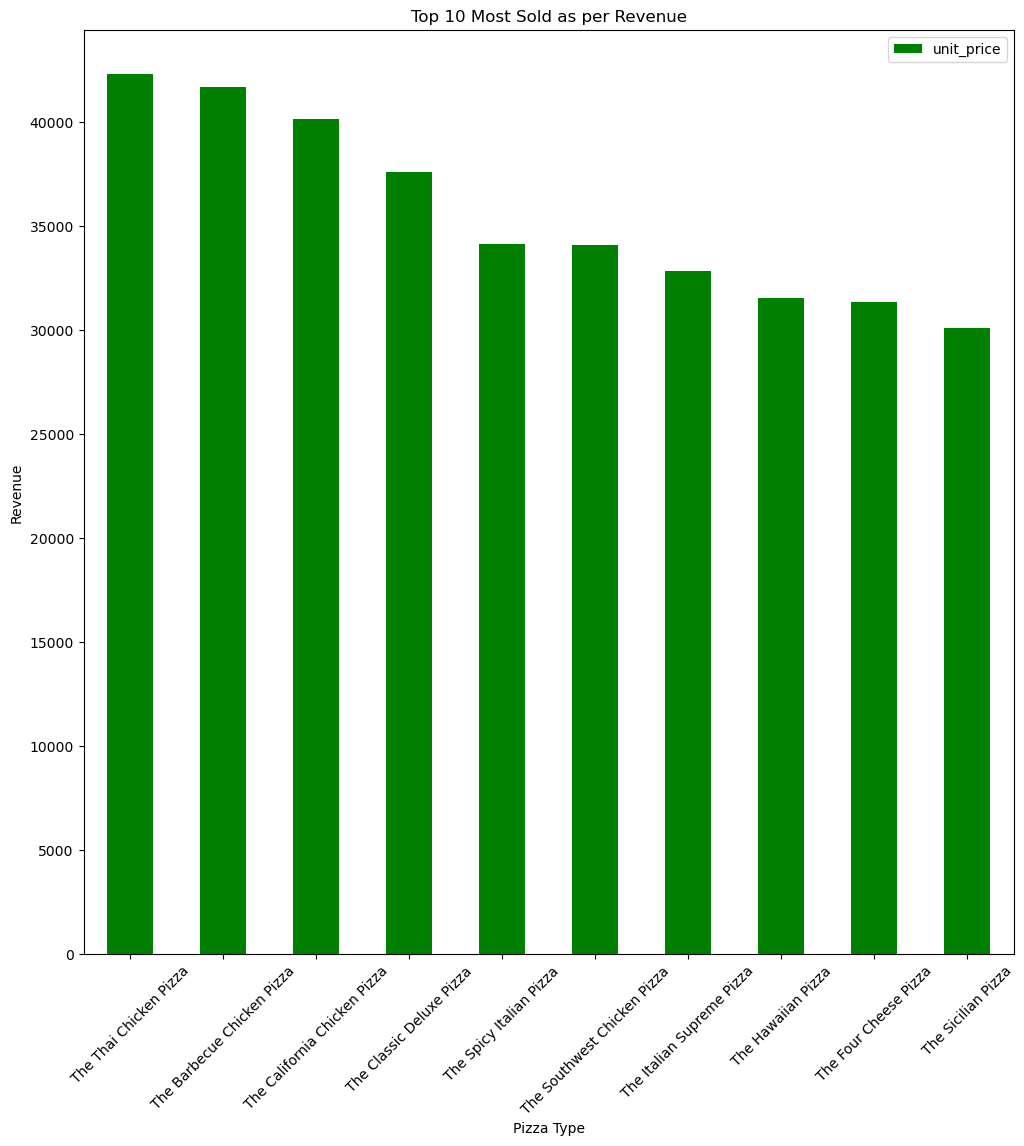

In [29]:
pizza_sales.head(10).to_frame().plot(kind='bar',color='green')
plt.ylabel('Revenue')
plt.xlabel('Pizza Type')
plt.xticks(rotation=45)
plt.title('Top 10 Most Sold as per Revenue')
plt.show()

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>Top 10 pizza có doanh thu cao nhất.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nhận xét:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Đồ thị cho thấy top 10 loại pizza bán chạy nhất theo doanh thu tại Hoa Kỳ. Trục hoành hiển thị tên loại pizza, và trục tung hiển thị doanh thu tương ứng.Loại pizza bán chạy nhất là The Thai Chicken Pizza, với doanh thu hơn 40.000 USD. Tiếp theo là The Barbecue Chicken Pizza, The California Chicken Pizza, The Classic Deluxe Pizza , The Spicy Italian Pizza, The Southwest Chicken Pizza, The Italian Supreme Pizza , The Hawaiian Pizza, The Four Cheese Pizza và The Sicilian Pizza.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Doanh thu của các loại pizza này dao động từ hơn 40.000 USD đến hơn 10.000 USD. The Thai Chicken Pizza và The Barbecue Chicken Pizza gà là hai loại pizza bán chạy nhất, với doanh thu cao hơn đáng kể so với các loại pizza khác</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Ngoài ra, đồ thị cũng cho thấy một số xu hướng sau:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Chicken pizza là loại pizza phổ biến nhất, chiếm 3 trong top 10 loại pizza bán chạy nhất.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Pizza với các nguyên liệu phổ biến như xúc xích, pepperoni và nấm cũng bán chạy.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Pizza với các hương vị cay như The Spicy Italian Pizza và The Southwest Chicken Pizza cũng đang ngày càng phổ biến.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">-> Đề xuất: Vì The Thai Chicken Pizza là loại pizza bán chạy nhất nên có thể đáng để quảng bá nó thêm hoặc giới thiệu các biến thể của cùng một hương vị để đáp ứng sở thích của khách hàng. </p>

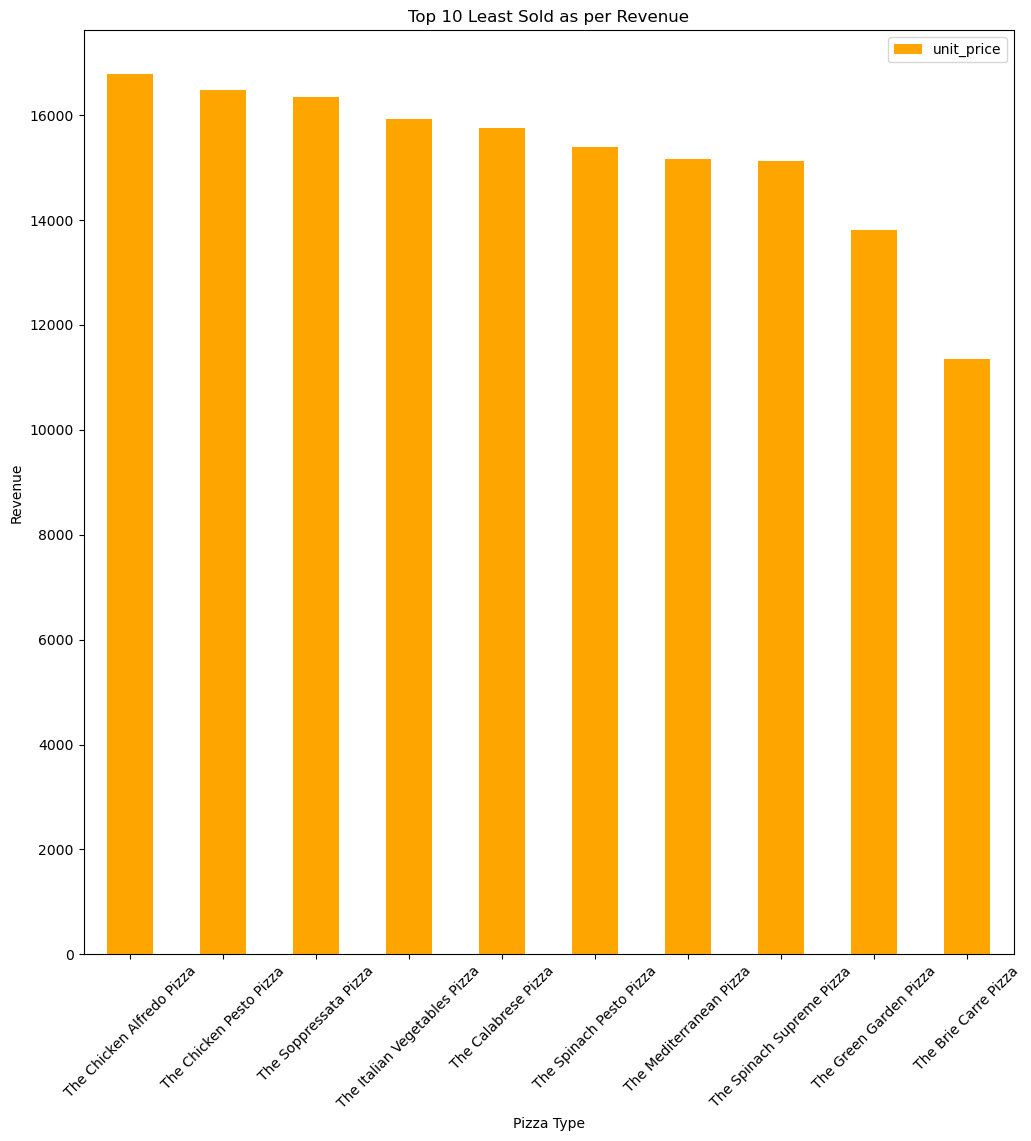

In [30]:
pizza_sales.tail(10).to_frame().plot(kind='bar',color='orange')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.xlabel('Pizza Type')
plt.title('Top 10 Least Sold as per Revenue')
plt.show()

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>Top 10 pizza có doanh thu thấp nhất.</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Nhận xét:</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Đồ thị trong hình ảnh thể hiện 10 loại pizza bán ít nhất theo doanh thu của các cửa hàng pizza tại Hoa Kỳ. Mỗi điểm dữ liệu trên đồ thị đại diện cho một loại pizza, với trục hoành thể hiện doanh thu và trục tung thể hiện tên loại pizza.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Loại pizza bán ít nhất: Loại pizza bán ít nhất theo doanh thu là Brie Carre Pizza, với doanh thu chỉ đạt gần 12000 đô la</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Loại pizza bán nhiều hơn: Loại pizza bán nhiều hơn trong danh sách này là The Chicken Alfredo Pizza, với doanh thu đạt hơn 16.000 đô la.</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Xu hướng chung: Nhìn chung, doanh thu của các loại pizza trong danh sách này giảm dần từ trái sang phải. Điều này cho thấy rằng các loại pizza ở bên trái đồ thị (The Chicken Alfredo Pizza, The Chicken Pesto Pizza, The Soppressata Pizza) bán chạy hơn các loại pizza ở bên phải đồ thị (The Brie Carre Pizza).</p>

### 8. Đưa ra doanh số của các loại pizza theo danh mục?

In [31]:
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('Solarize_Light2')
plt.style.context('grayscale')

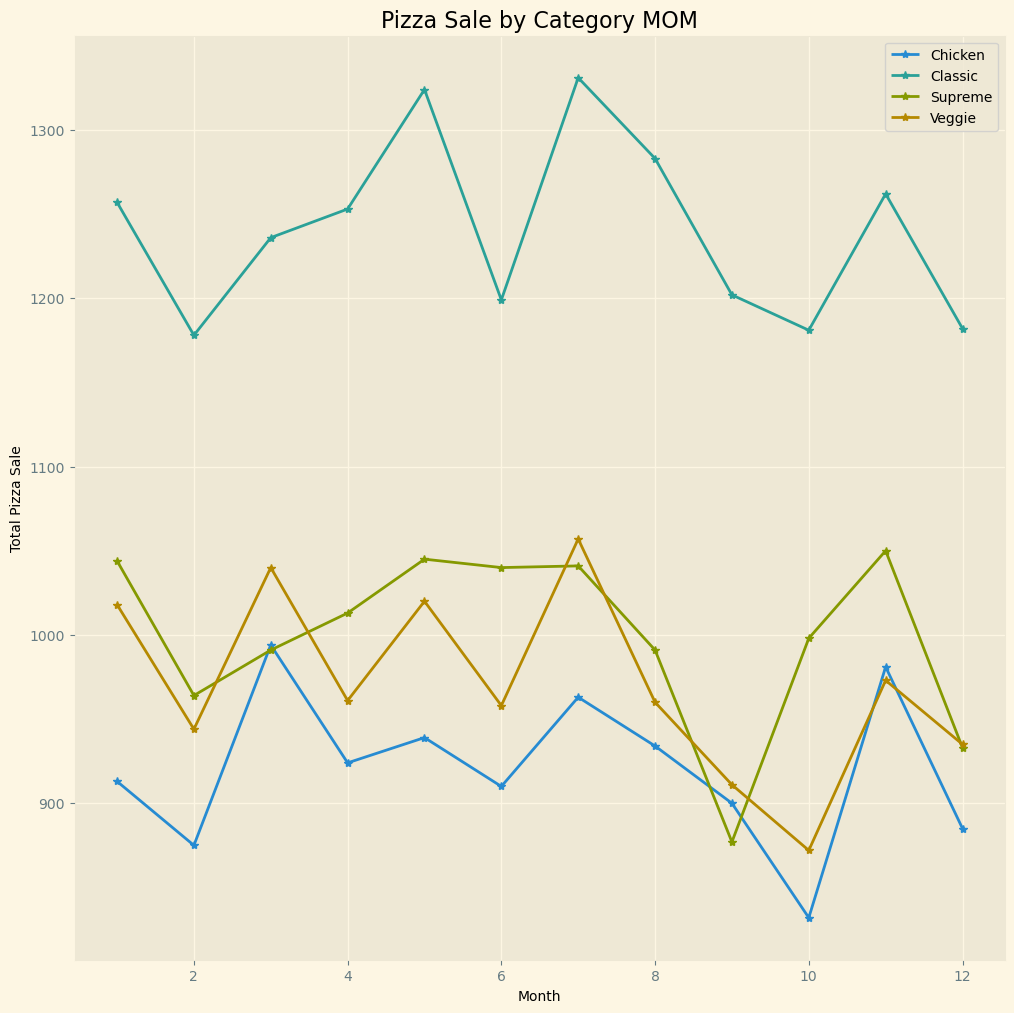

In [32]:
df['order_month'] =pd.DatetimeIndex (df['order_date']).month
df.groupby(["order_month","pizza_category"])["quantity"].sum().unstack().plot(marker = "*")
plt.xlabel("Month",fontsize = 10, color = "black")
plt.ylabel("Total Pizza Sale",fontsize = 10, color = "black")
plt.title("Pizza Sale by Category MOM")
plt.legend(loc='best')

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>Doanh số bán pizza theo danh mục:</h3>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Classic: Danh mục này có doanh số bán pizza cao nhất với mức cao nhất đạt được vào tháng 5 và tháng 7, các tháng 2, 6, 10, 12 có doanh số thấp đáng kể</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Supreme: các tháng có doanh số cao rơi vào tháng 1, 3, 5, 7, các tháng có doanh số thấp là tháng 2, 9, 12, doanh số tháng 9 là thấp nhất</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Veggie: các tháng có doanh số cao rơi vào tháng 1, 5, 7, 11, các tháng có doanh số thấp là tháng 2, 4, 6, 10, doanh số tháng 10 là thấp nhất</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">- Chicken: Danh mục này có doanh số bán pizza thấp nhất với doanh thu mức cao đạt được vào tháng 3, 7, 11, các tháng 2, 10 có doanh thu thấp nhất</p>
    <p style = "font-size: 16px;line-height: 1.35; padding-left: 20px">* Nìn chung, về doanh số, pizza Classic có doanh thu cao nhất, pizza Chicken có doanh thu thấp nhất, các tháng 3, 5, 7, 11 có xu hướng đạt doanh thu cao</p>